In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from functools import reduce
import operator

from common_plotting import read_data, find_file, add_thp
from common_analysis import rel_data_cut_index_last, combine_stds_sum, combine_stds_mean, display_full_df
from common_analysis_dcv import (analyse_dcv_absolute, analyse_dcv_relative, analyse_dcv_k182, analyse_dcv_k182_for_other_reference, add_dut_neg_and_pos_group)

plt.rcParams["figure.figsize"] = (10,4)
plt.rc('font', size=14)

# Load data

In [2]:
thp_data, data = read_data(['ks3458a1-dcv-log.csv'])
absolute_data_3458a_1 = data['ks3458a1-dcv-log.csv']


In [14]:
ut330c_data = pd.read_csv(find_file('UNT330C_20231108_052203.log.csv'), parse_dates=['DateTime'], encoding='latin_1')
ut330c_data['datetime_corrected'] = ut330c_data['DateTime'] - pd.Timedelta('1h')
ut330c = ut330c_data.drop(['  NO.', '°F', 'DateTime'], axis=1).set_index('datetime_corrected').dropna()
ut330c.columns= ['temperature', 'humidity', 'pressure', 'dew_point']

# 2023-11-08

In [45]:
f730a_data = absolute_data_3458a_1[(absolute_data_3458a_1.index > pd.Timestamp(2023,11,7,0)) & (absolute_data_3458a_1.index < pd.Timestamp(2023,11,9,0)) & ~(absolute_data_3458a_1.dut.str.startswith('D4700'))].rename(columns={'temperature': 'BME280_temperature', 'humidity': 'BME280_humidity', 'pressure': 'BME280_pressure'}, inplace=False)
f730a_data_with_ut330c_data = add_thp(ut330c, f730a_data.reset_index()).rename(columns={'temperature': 'UT330C_temperature', 'humidity': 'UT330C_humidity', 'pressure': 'UT330C_pressure'}, inplace=False)
grouped_by_dut_and_setting = f730a_data_with_ut330c_data.groupby(['dut', 'dut_setting']).agg({'ag3458a_1_dcv': ['mean', 'std', 'sem', 'count'], 'BME280_temperature': ['mean', 'std'], 'BME280_pressure': ['mean', 'std'], 'BME280_humidity': ['mean', 'std'], 'UT330C_temperature': ['mean', 'std'], 'UT330C_pressure': ['mean', 'std'], 'UT330C_humidity': ['mean', 'std']}).reset_index()
grouped_by_dut_and_setting['polarity_corrected_dcv'] = grouped_by_dut_and_setting[('ag3458a_1_dcv', 'mean')] * np.sign(grouped_by_dut_and_setting[('dut_setting', '')].str.slice(0, 2).astype(float))
grouped_by_dut = grouped_by_dut_and_setting.groupby('dut').agg({('polarity_corrected_dcv', ''): ['mean'], ('ag3458a_1_dcv', 'std'): combine_stds_sum, ('ag3458a_1_dcv', 'sem'): combine_stds_mean, ('ag3458a_1_dcv', 'count'): 'sum', ('BME280_temperature', 'mean'): 'mean', ('BME280_temperature', 'std'): combine_stds_sum, ('BME280_pressure', 'mean'): 'mean', ('BME280_pressure', 'std'): combine_stds_sum, ('BME280_humidity', 'mean'): 'mean', ('BME280_humidity', 'std'): combine_stds_sum, ('UT330C_temperature', 'mean'): 'mean', ('UT330C_temperature', 'std'): combine_stds_sum, ('UT330C_pressure', 'mean'): 'mean', ('UT330C_pressure', 'std'): combine_stds_sum, ('UT330C_humidity', 'mean'): 'mean', ('UT330C_humidity', 'std'): combine_stds_sum})
grouped_by_dut.columns = pd.MultiIndex.from_tuples([('ag3458a_1_dcv', 'mean'), ('ag3458a_1_dcv', 'std'), ('ag3458a_1_dcv', 'sem'), ('ag3458a_1_dcv', 'count'), ('BME280_temperature', 'mean'), ('BME280_temperature', 'std'), ('BME280_pressure', 'mean'), ('BME280_pressure', 'std'), ('BME280_humidity', 'mean'), ('BME280_humidity', 'std'), ('UT330C_temperature', 'mean'), ('UT330C_temperature', 'std'), ('UT330C_pressure', 'mean'), ('UT330C_pressure', 'std'), ('UT330C_humidity', 'mean'), ('UT330C_humidity', 'std')])
display(grouped_by_dut)

ag3458a_1_dcv                                   BME280_temperature  \
                  mean           std           sem count               mean   
dut                                                                           
F7001bat      9.999930  8.405889e-07  5.645004e-08   212          30.257730   
F730a1       10.000039  8.646957e-07  9.061145e-08    89          30.121589   
F730a2        9.999128  6.926842e-04  6.800414e-05   102          30.026830   
F730a3       10.000108  1.319563e-04  1.044531e-05   121          30.033736   
F730a4        9.999524  6.222024e-06  6.786934e-07    87          30.002380   

                   BME280_pressure           BME280_humidity            \
               std            mean       std            mean       std   
dut                                                                      
F7001bat  0.371602     1010.337390  0.053358       29.171316  0.439125   
F730a1    0.056079     1010.315694  0.031982       29.311146  0.180132   
F730a2    0.049135     1010.293022  0.029657       29.352684  0.150693   
F730a3    0.065396     1010.332743  0.041112       29.349811  0.190871   
F730a4    0.079282     1010.353649  0.023401       29.449564  0.193116   

         UT330C_temperature      UT330C_pressure      UT330C_humidity       
                       mean  std            mean  std            mean  std  
dut                                                                         
F7001bat               26.3  0.0          1024.2  0.0            48.8  0.0  
F730a1                 26.3  0.0          1024.2  0.0            48.8  0.0  
F730a2                 26.3  0.0          1024.2  0.0            48.8  0.0  
F730a3                 26.3  0.0          1024.2  0.0            48.8  0.0  
F730a4                 26.3  0.0          1024.2  0.0            48.8  0.0

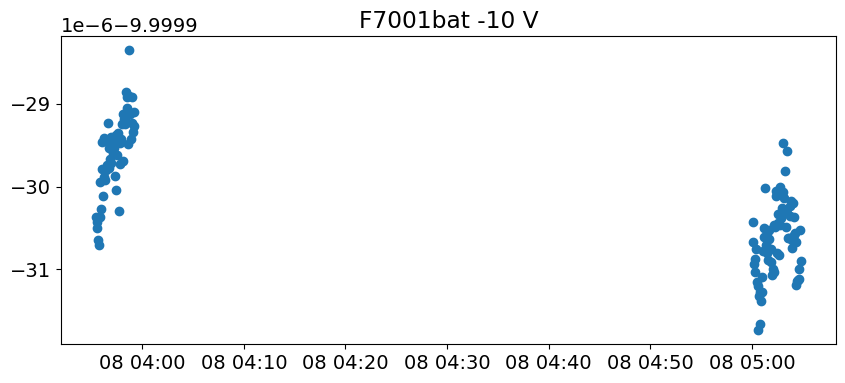

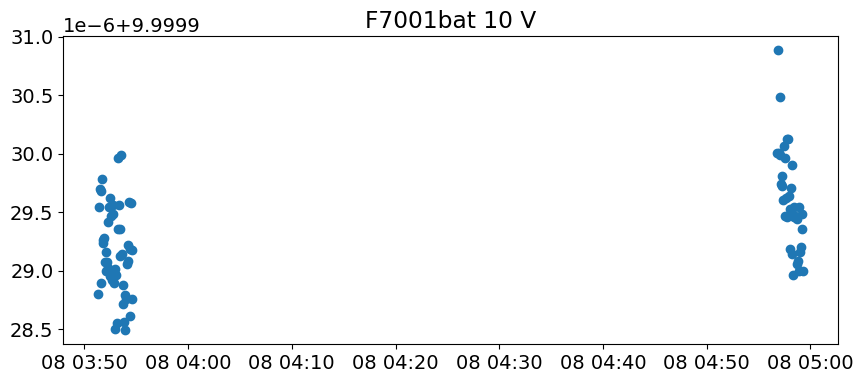

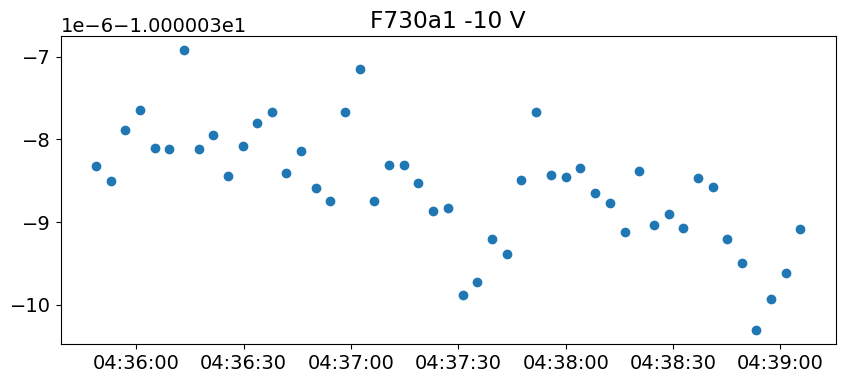

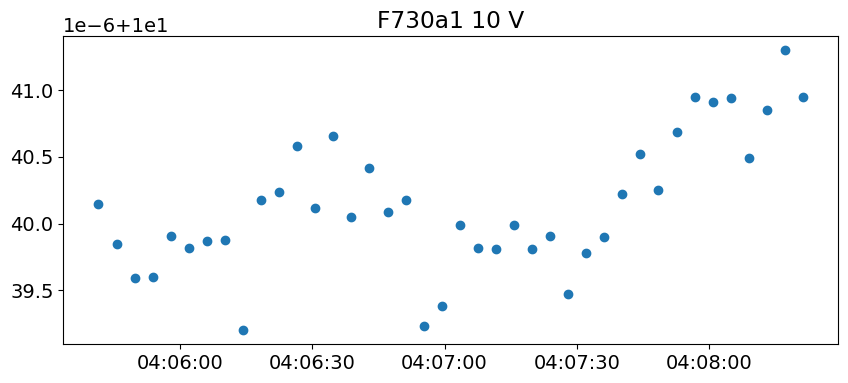

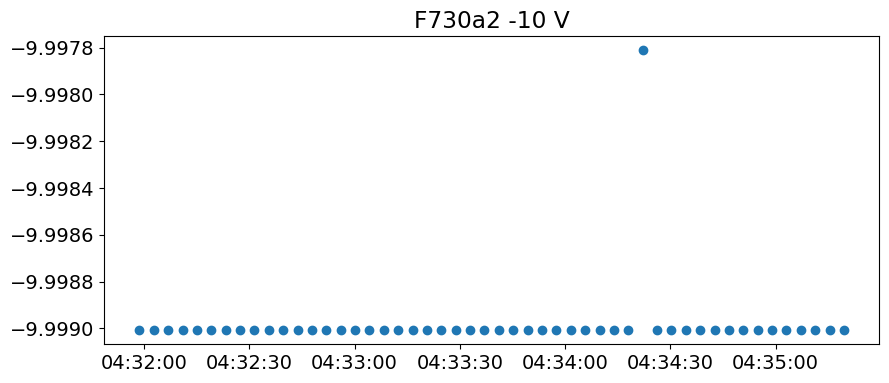

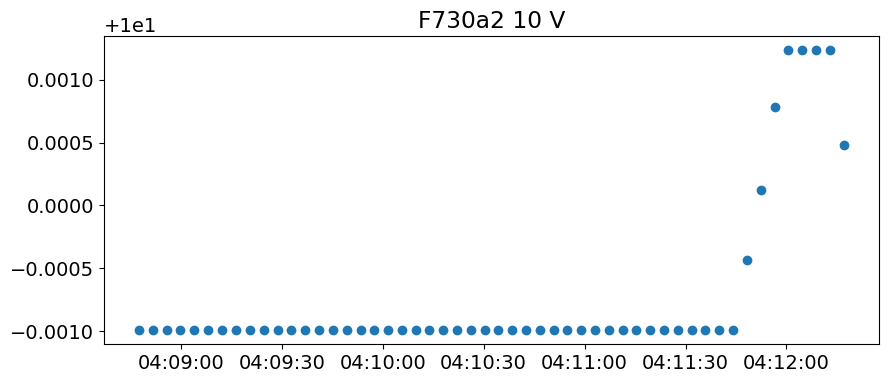

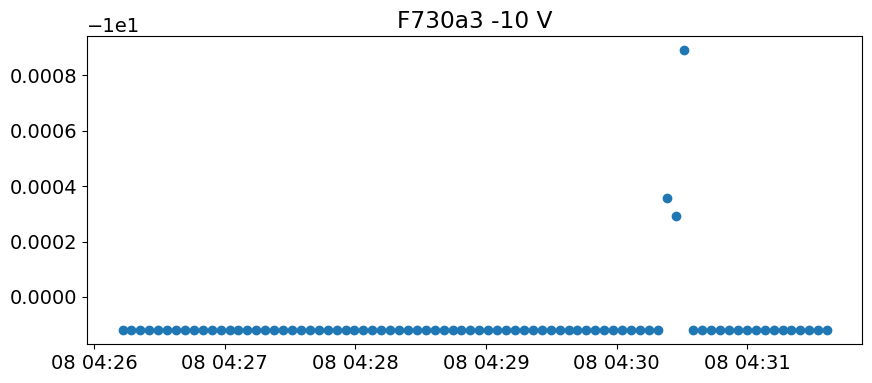

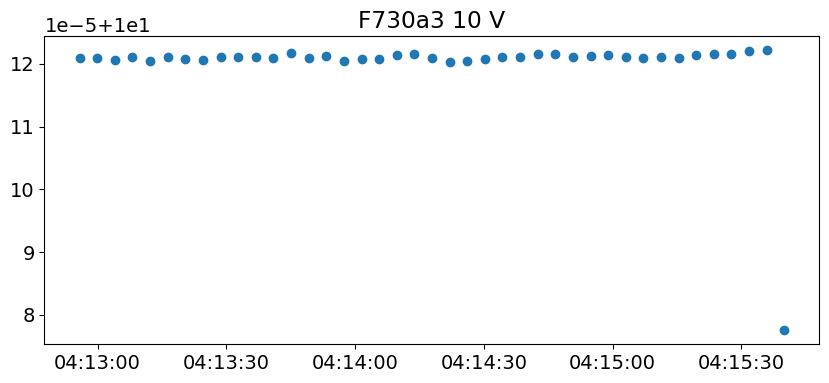

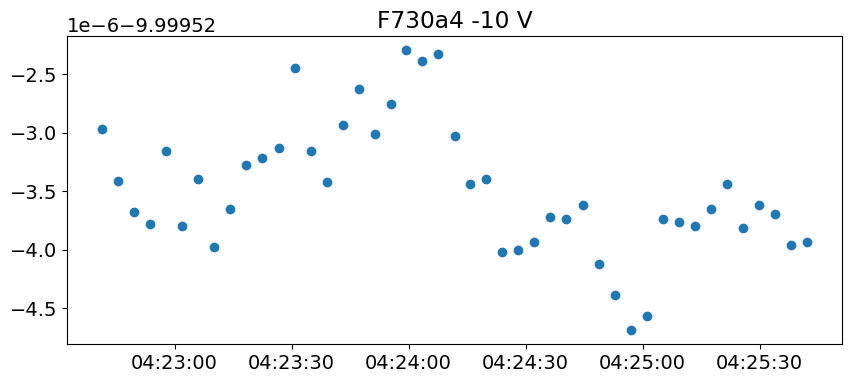

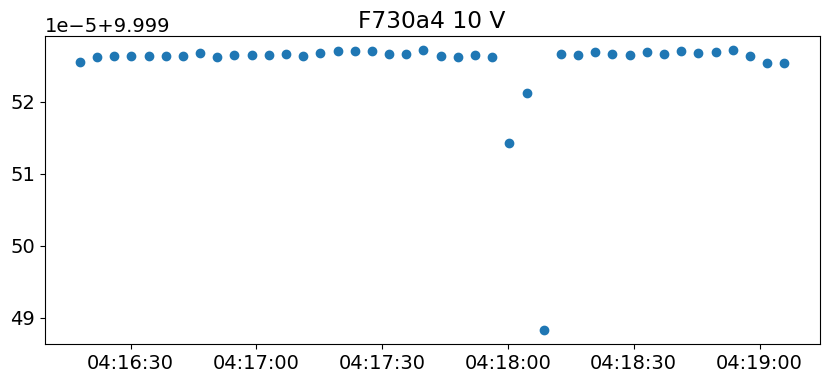

In [46]:
group_data = f730a_data_with_ut330c_data
group_means = group_data.groupby(['dut', 'dut_setting']).agg({'ag3458a_1_dcv': 'mean'})
for group_mean in group_means.iterrows():
    group = group_data[(group_data.dut == group_mean[0][0]) & (group_data.dut_setting == group_mean[0][1])].copy()
    plt.scatter(group.index, group['ag3458a_1_dcv'])
    plt.title(f"{group_mean[0][0]} {group_mean[0][1]}")
    plt.show()